# ML Task 4

In [30]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [31]:
categories = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']

In [32]:
data_path = "/kaggle/input/leapgestrecog/leapGestRecog"

In [33]:
image_data = []
for dr in os.listdir(data_path):
    for category in categories:
        class_index = categories.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (50, 50)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[4, 5, 7, ..., 4, 3, 4],
        [6, 6, 6, ..., 4, 4, 3],
        [5, 6, 6, ..., 5, 4, 4],
        ...,
        [6, 6, 6, ..., 5, 6, 4],
        [6, 5, 5, ..., 5, 6, 4],
        [4, 6, 6, ..., 5, 4, 5]], dtype=uint8),
 0]

In [34]:
import random
random.shuffle(image_data)

In [35]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

In [36]:
label[:4]

[2, 5, 8, 1]

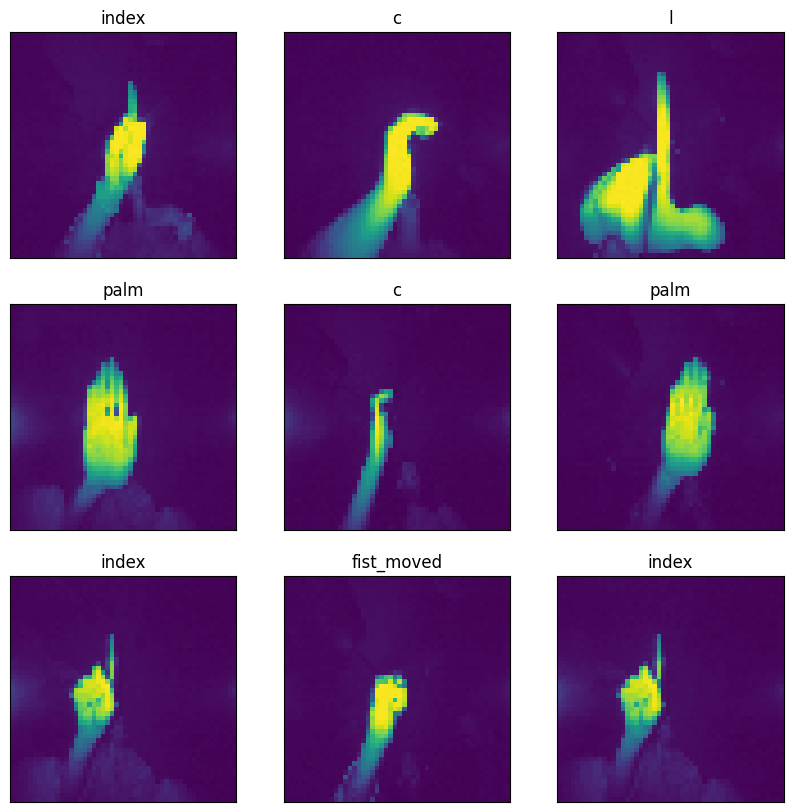

In [37]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='viridis')
    plt.xticks([])
    plt.yticks([])
    plt.title(categories[label[i]][3:])
plt.show()

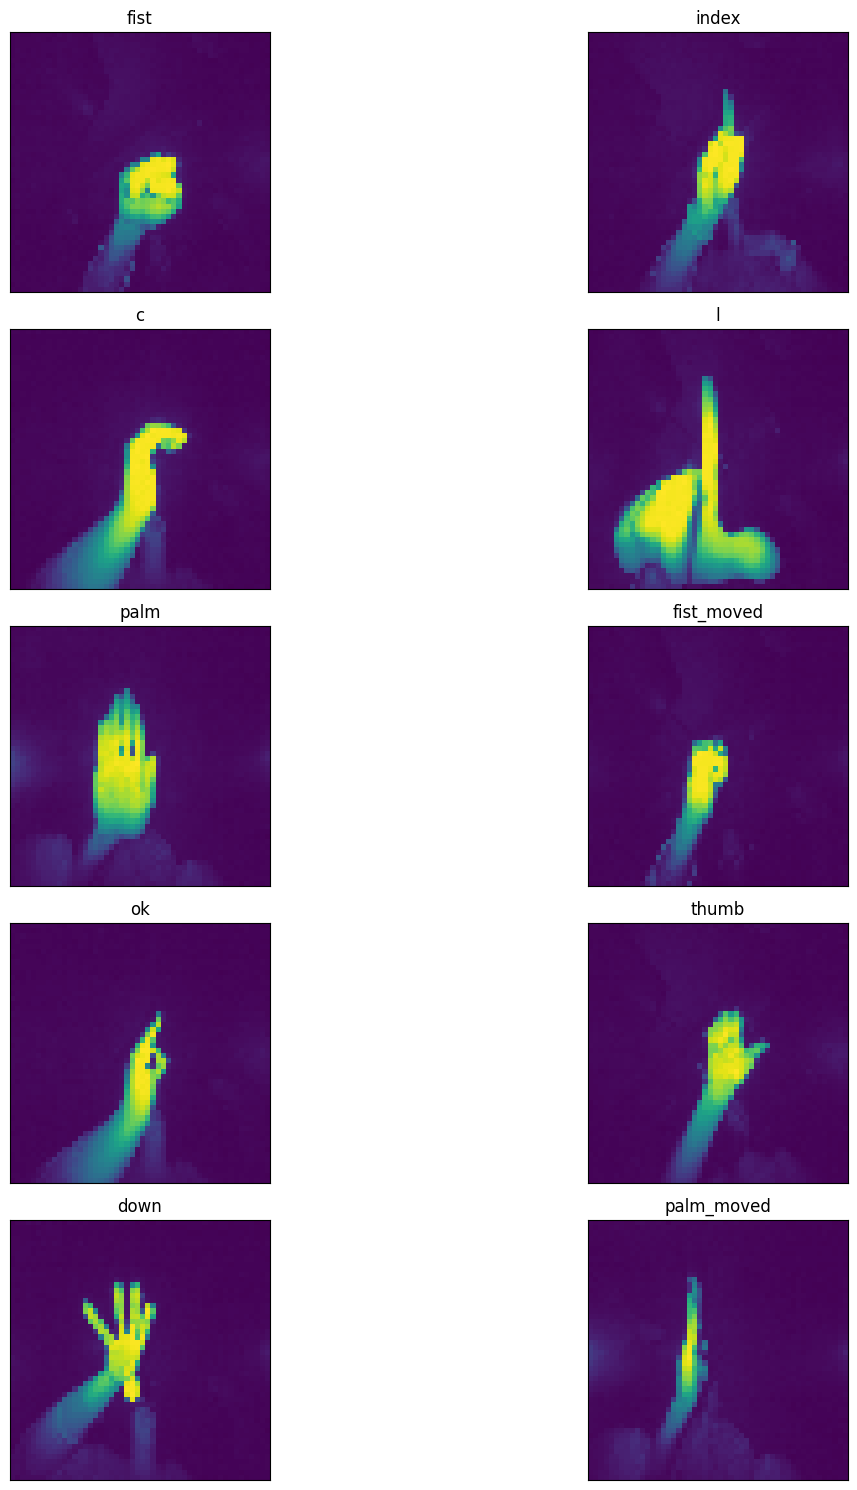

In [38]:
images_by_category = {}
for image, class_index in image_data:
    category = categories[class_index]
    if category not in images_by_category:
        images_by_category[category] = image
    if len(images_by_category) == len(categories):
        break
plt.figure(figsize=(15, 15))
for i, (category, image) in enumerate(images_by_category.items()):
    plt.subplot(5, 2, i + 1)  
    plt.imshow(image, cmap='viridis')  
    plt.title(category[3:])
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()


In [39]:
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [40]:
print(input_data[:4])
print(label[:4])

[[[0.01568627 0.01960784 0.01568627 ... 0.01568627 0.01568627 0.01176471]
  [0.01568627 0.01960784 0.01960784 ... 0.01176471 0.01176471 0.01568627]
  [0.01568627 0.01960784 0.01960784 ... 0.01568627 0.01568627 0.01176471]
  ...
  [0.01960784 0.01960784 0.01960784 ... 0.01960784 0.01960784 0.01960784]
  [0.01176471 0.01960784 0.01568627 ... 0.01960784 0.01568627 0.01568627]
  [0.01960784 0.01568627 0.01568627 ... 0.01960784 0.01568627 0.01176471]]

 [[0.01960784 0.01960784 0.01960784 ... 0.01568627 0.01960784 0.01176471]
  [0.01568627 0.01960784 0.01960784 ... 0.01960784 0.01960784 0.01960784]
  [0.01960784 0.01960784 0.02352941 ... 0.01568627 0.01568627 0.01568627]
  ...
  [0.01568627 0.01568627 0.01960784 ... 0.01176471 0.01568627 0.01568627]
  [0.01568627 0.01960784 0.01568627 ... 0.01960784 0.01568627 0.01176471]
  [0.01568627 0.01568627 0.01960784 ... 0.01960784 0.02352941 0.01568627]]

 [[0.02352941 0.02352941 0.01960784 ... 0.01960784 0.01960784 0.01568627]
  [0.01960784 0.019607

In [41]:
print(f"Total images loaded: {len(input_data)}")

Total images loaded: 20000


In [42]:
import keras
label = keras.utils.to_categorical(label, num_classes=10)
label[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [43]:
input_data.shape = (-1, 50, 50, 1)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

In [45]:
model = keras.models.Sequential()

In [46]:
model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (50, 50, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [47]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 46, 46, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 46, 46, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,669,290 (6.37 MB)

 Trainable params: 1,669,290 (6.37 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
hand_model = model.fit(X_train, y_train, epochs = 15, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 61s 134ms/step - accuracy: 0.7020 - loss: 0.8952 - val_accuracy: 0.9890 - val_loss: 0.0275
Epoch 2/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 57s 130ms/step - accuracy: 0.9920 - loss: 0.0284 - val_accuracy: 0.9970 - val_loss: 0.0120
Epoch 3/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 64s 145ms/step - accuracy: 0.9956 - loss: 0.0151 - val_accuracy: 0.9995 - val_loss: 0.0023
Epoch 4/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 56s 127ms/step - accuracy: 0.9965 - loss: 0.0113 - val_accuracy: 0.9952 - val_loss: 0.0169
Epoch 5/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 56s 127ms/step - accuracy: 0.9963 - loss: 0.0113 - val_accuracy: 0.9965 - val_loss: 0.0096
Epoch 6/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 57s 130ms/step - accuracy: 0.9971 - loss: 0.0097 - val_accuracy: 0.9992 - val_loss: 0.0036
Epoch 7/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 80s 127ms/step - accuracy: 1.0000 - loss: 2.5583e-04 - val_accuracy: 0.9993 - val_loss: 0.0032
Epoch 8/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 56s 127ms/step - accuracy: 0.9998 - los

In [50]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test accuracy: {test_accuracy*100:2.2f}%')

188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9996 - loss: 0.0034
Test accuracy: 99.97%


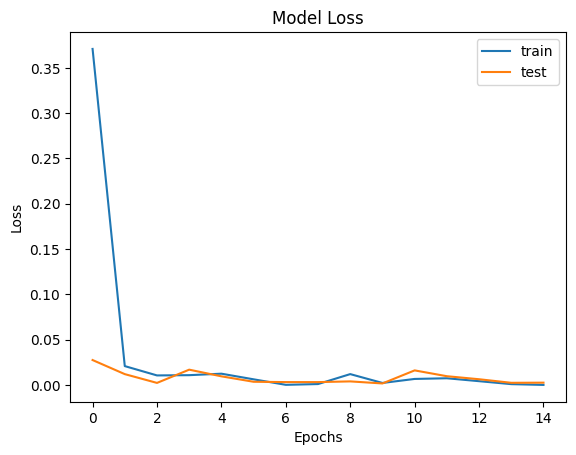

In [51]:
plt.plot(hand_model.history.get('loss', []))
plt.plot(hand_model.history.get('val_loss', []))
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

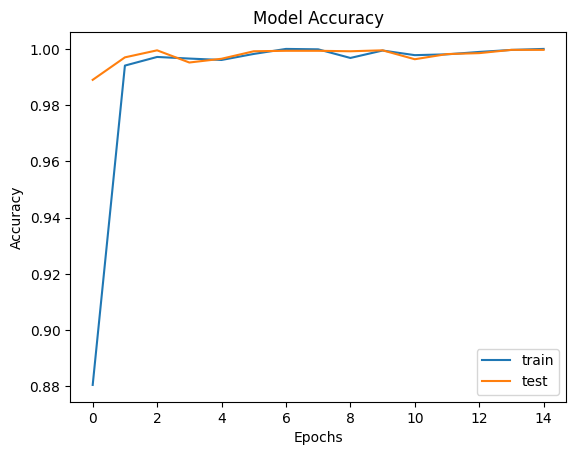

In [52]:
plt.plot(hand_model.history.get('accuracy', []))
plt.plot(hand_model.history.get('val_accuracy', []))
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [53]:
predictions = model.predict(X_test)
predictions

188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step


array([[2.0546249e-10, 1.2349751e-17, 5.4460983e-17, ..., 2.8938701e-16,
        1.1044777e-23, 2.6094920e-12],
       [3.7948109e-20, 4.0403022e-24, 3.6072801e-17, ..., 9.5802529e-16,
        8.0521006e-31, 9.9999994e-01],
       [9.9999982e-01, 5.5703840e-08, 5.0474393e-15, ..., 1.2085528e-07,
        1.7950566e-16, 1.0009843e-08],
       ...,
       [1.0722659e-16, 9.9999994e-01, 1.8876370e-16, ..., 1.5141178e-15,
        9.9726165e-22, 7.4852193e-14],
       [7.2808555e-15, 1.0352595e-16, 5.7910446e-16, ..., 8.8005792e-12,
        4.2030536e-20, 9.9999994e-01],
       [5.2461340e-19, 1.1563140e-14, 4.8418168e-29, ..., 9.9999994e-01,
        2.9303717e-17, 4.0047077e-14]], dtype=float32)

In [54]:
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
for i in range(10):
    print(f'Predicted: {predicted_classes[i]}, Actual: {true_classes[i]}')

Predicted: 6, Actual: 6
Predicted: 9, Actual: 9
Predicted: 0, Actual: 0
Predicted: 9, Actual: 9
Predicted: 5, Actual: 5
Predicted: 6, Actual: 6
Predicted: 9, Actual: 9
Predicted: 6, Actual: 6
Predicted: 1, Actual: 1
Predicted: 7, Actual: 7


In [55]:
print('Train data    :'+str(X_train.shape))
print('Test data     :'+str(X_test.shape))
print('Train Output  :'+str(y_train.shape))
print('Test Output   :'+str(y_test.shape))

Train data    :(14000, 50, 50, 1)
Test data     :(6000, 50, 50, 1)
Train Output  :(14000, 10)
Test Output   :(6000, 10)


In [56]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.9996 - loss: 0.0035


In [68]:
conf_matrix = confusion_matrix(true_classes, predicted_classes)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[622   1   0   0   0   0   0   0   0   0]
 [  0 608   0   0   0   0   0   0   0   0]
 [  0   0 598   0   0   0   0   0   0   0]
 [  0   0   0 598   0   0   0   0   0   0]
 [  0   0   1   0 590   0   0   0   0   0]
 [  0   0   0   0   0 586   0   0   0   0]
 [  0   0   0   0   0   0 610   0   0   0]
 [  0   0   0   0   0   0   0 584   0   0]
 [  0   0   0   0   0   0   0   0 613   0]
 [  0   0   0   0   0   0   0   0   0 589]]


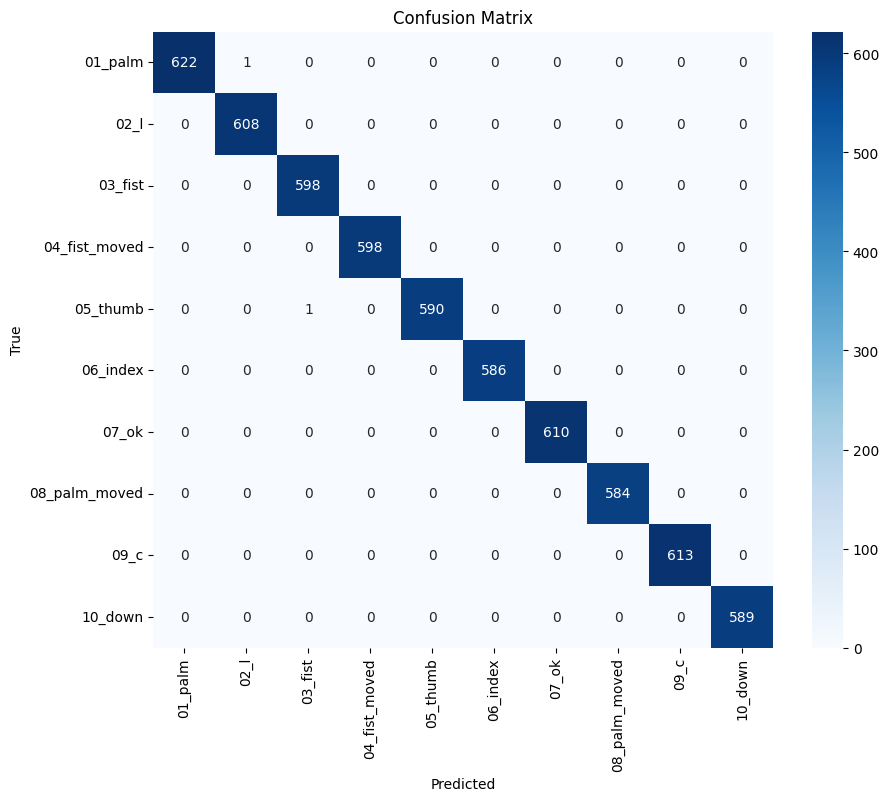

In [58]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [59]:
from sklearn.metrics import classification_report

print(classification_report(true_classes, predicted_classes, target_names=categories))

               precision    recall  f1-score   support

      01_palm       1.00      1.00      1.00       623
         02_l       1.00      1.00      1.00       608
      03_fist       1.00      1.00      1.00       598
04_fist_moved       1.00      1.00      1.00       598
     05_thumb       1.00      1.00      1.00       591
     06_index       1.00      1.00      1.00       586
        07_ok       1.00      1.00      1.00       610
08_palm_moved       1.00      1.00      1.00       584
         09_c       1.00      1.00      1.00       613
      10_down       1.00      1.00      1.00       589

     accuracy                           1.00      6000
    macro avg       1.00      1.00      1.00      6000
 weighted avg       1.00      1.00      1.00      6000



In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
